# Наилучшее среднеквадратичное приближение функции

In [1]:
# модули для математических операций
import math
import numpy as np
import system_solvers # алгоритмы из ВМА
# модули для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
# модули для работы с данными
import pandas as pd
pd.options.display.float_format ='{:,.7f}'.format

## Постановка задачи

Проблема наилучшего среднеквадратичного приближения формулируется следующим образом. Пусть задана функция $f(x) = x\cos x$ на отрезке $[a,b]$. Тогда необходимо
1. имея значения функции $f(x_i)$ в одних точках, найти значения функции в других точках;
2. имея некоторую функцию $f(x)$, которую трудно вычислить, мы будем заменять ее другой функцией $\varphi(x,a)$, где $a$ --- векторный параметр, которую легко вычислить.

In [89]:
def f(x):
    return x*np.cos(x)

## Общие сведения о решении задачи

Задачи приближения функции можно классифицировать на линейные и нелинейные. Задача считается линейной, если множество, из которого мы берем функцию $\varphi(x)$ является линейным. Соответственно при решении задачи мы будем также разделять способы построения приближения на линейные и нелинейные.

Сперва рассмотрим алгоритм построения линейного наилучшего среднеквадратичного приближения. Поскольку в данном случае мы строим среднеквадратичное приближение в линейном пространстве, то в качестве такого пространства будем рассматривать гильбертово пространство $H$, так как из теории функционального анализа известно, что существует единственный элемент наилучшего приближения в таком пространстве.

Пусть подпространство $\Phi$ порождено элементами $\varphi_0,\varphi_1,\ldots, \varphi_n$. Обозначим $\Phi_0$ --- элемент наилучшего приближения к $f$ в $\Phi$. Поскольку $\Phi_0 \in \Phi$, то он представим в виде линейной комбинации $$\Phi_0 = \sum_{i=0}^{n}c_i\varphi_i.$$
 Задача отыскания $\Phi_0$ равносильна отысканию коэффициентов $c_0,\ldots, c_n$ таких, чтобы выполнялось равенство $$(f-\Phi_0, \varphi) = 0\ \forall \varphi \in \Phi.$$
 Последнее равенство равносильно системе условий вида $$(f-\Phi_0, \varphi_j) = 0, j = 0,1,\ldots, n.$$
 Эти равенства представляют собой систему линейных алгебраических уравнений вида $$\begin{cases}
 	c_0(\varphi_0,\varphi_0) + \ldots + c_n(\varphi_n, \varphi_n) = (f,\varphi_0),\\
 	\vdots\\
 	c_0(\varphi_0,\varphi_n) + \ldots + c_n(\varphi_n, \varphi_n) = (f,\varphi_n)
 \end{cases}$$
 
  Таким образом, для построения элемента наилучшего приближения в гильбертовом пространстве необходимо сделать два пункта
1. выбрать систему базисных элементов $\varphi_0,\ldots, \varphi_n$ подпространства $\Phi$;
2. составить и решить систему указанную выше.

 Пусть $H = L_2(p)[a,b]$ --- пространство вещественнозначных функций интегрируемых с квадратом на отрезке $[a,b]$ по весу $p(x)$. Норма в этом пространстве задается как $$||f|| = (f,f)^{\frac12} = \Big(\int\limits_a^b p(x) f^2(x)dx\Big)^{\frac12}.$$
Скалярное произведение как $$(f,g) = \int\limits_a^b p(x) f(x) g(x)dx.$$
При этом вес $p(x)$ удовлетворяет условиям:
1. $p(x) \geq 0$ $\forall x \in [a,b]$;
2. $p(x)$ обращается в ноль не более чем на множестве меры нуль.

## Построение линейного наилучшего среднеквадратичного приближения

### Наилучшее полиномиальное среднеквадратичное приближение для непрерывно заданной функции
#### Теоретические выкладки
В качестве системы базисных функций возьмем функции $1, x, \ldots, x^n$, или $\varphi_i = x^i$, $i=\overline{0,n}$. Обобщенный многочлен в этом случае превращается в алгебраический многочлен вида $$\varphi = P_n(x) = \sum_{i=0}^{n}c_ix^i,\quad c_i \in\mathbb{R}$$
Согласно общей теории существует единственный элемент $\varphi^* = P_n^*(x)$, который дает наилучшее приближение данной функции $f$ в пространстве $H$.
Для того, чтобы задать $P_n^*$ нужно решить систему с выбранными базисными функциями $\varphi_i$, которая в данном случае примет следующий вид $$\begin{cases}
 	c_0s_0 + c_1s_1 + \ldots + c_ns_n = m_0,\\
 	c_0s_1 + c_1s_2 + \ldots + c_ns_{n+1} = m_1,\\
 	\vdots\\
 	c_0s_n + c_1s_{n+1} + \ldots + c_ns_{2n} = m_n.
 \end{cases}$$
 $$s_i = \int\limits_a^b p(x) x^i dx,\quad m_j= \int\limits_a^b p(x) f(x) x^j dx,\quad i=\overline{0,2n}, j=\overline{0,n}.$$

#### Построение приближения многочленом первой степени
Попробуем построить приближение функции $f(x) = x\cos x$ заданной на отрезке $[a,b]=[0, 1]$ с помощью линейной функции $$\varphi(x) = c_0 + c_1x.$$ Возьмем вес $p(x) = 1$.
Для построения приближающей функции нам необходимо решить систему
$$\begin{cases}
c_0 s_0 + c_1 s_1 = \int\limits_{0}^1 x\cos x dx,\\
c_0 s_1 + c_1 s_2 = \int\limits_{0}^1 x^2\cos x dx;
\end{cases}$$
где $$s_i = \int\limits_a^b x^idx = \dfrac{x^{i+1}}{i+1}\Big|_0^1 = \dfrac{1}{i+1}$$

In [73]:
def s(i):
    return 1 / (i + 1)

Вычислим значения каждого из интегралов
$$\int\limits_{0}^1 x\cos x dx = x\sin x \Big|_{0}^1 + \cos x\Big|_{0}^1 = \sin1 + \cos1 - 1,$$
$$\int\limits_{0}^1 x^2\cos x dx = (x^2-2)\sin x \Big|_{0}^1 +2x\cos x\Big|_{0}^1 = -\sin1 +2 \cos1.$$
Взяв ранее построенный алгоритм метода Гаусса с выбором главного элемента по столбцу, найдем решение получившейся системы уравнений относительно $c_i$.

In [71]:
coefficients = system_solvers.gaussian_column( 
    [[s(0), s(1)], 
    [s(1), s(2)]], 
    
    [np.sin(1) + np.cos(1) - 1, 
    -np.sin(1) + 2*np.cos(1)])[0]

coefficients

[0.09229140113384732, 0.5789637790843775]

Построим многочлен с соответствующими коэффициентами $$\varphi(x) = 0.09229 + 0.57896x.$$

In [68]:
def phi(x, coefficients):
    phi = 0
    n = len(coefficients)
    for i in range(n):
        phi += x**i * coefficients[i]
    return phi

Теперь построим график исходной функции и построенного приближения

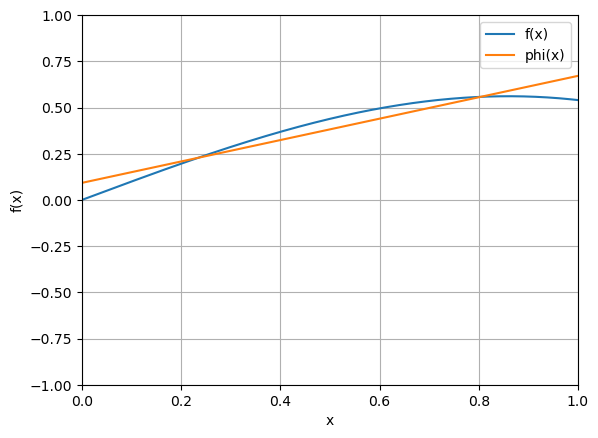

In [69]:
x = np.linspace(0, 1, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x, coefficients), label='phi(x)')
ax.set_xlim(0, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Рассчитаем среднеквадратичное отклонение функции от ее приближения:
$$|| f(x) - \varphi(x) || ^2 = \int\limits_0^1 x\cos x - 0.09229 - 0.57896x\ dx=$$ $$= x\sin x + \cos x - 0.09229 x - 0.57896\dfrac{x^2}{2} \Big|_0^1 = 3.29068\cdot 10^{-6}.$$

#### Построение приближения многочленом второй степени
Попробуем построить приближение функции $f(x) = x\cos x$ заданной на отрезке $[a,b]=[0, 2]$ с помощью квадратичной функции $$\varphi(x) = c_0 + c_1x +c_2x^2.$$ Возьмем вес $p(x) = 1$.
Для построения приближающей функции нам необходимо решить систему
$$\begin{cases}
c_0 s_0 + c_1 s_1 + c_2s_2 = \int\limits_{0}^2 x\cos x dx,\\
c_0 s_1 + c_1 s_2 + c_2 s_3 = \int\limits_{0}^2 x^2\cos x dx,\\
c_0 s_2 + c_1 s_3 + c_2s_4 = \int\limits_{0}^2 x^3\cos x dx;\\
\end{cases}$$
где $$s_i = \int\limits_a^b x^idx = \dfrac{x^{i+1}}{i+1}\Big|_0^2 = \dfrac{2^{i+1}}{i+1}$$

In [82]:
def s(i):
    return 2**(i + 1) / (i + 1)

Предварительно построим алгоритм, который будет составлять матрицу $S$, состоящую из коэффициентов $s_i$.

In [83]:
def S(n):
    S = [[None]*n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            S[i][j] = s(i+j)
    return S

In [84]:
S(3)

[[2.0, 2.0, 2.6666666666666665],
 [2.0, 2.6666666666666665, 4.0],
 [2.6666666666666665, 4.0, 6.4]]

Вычислим значения каждого из интегралов
$$\int\limits_{0}^2 x\cos x dx = 2\sin2 + \cos2 - 1,$$
$$\int\limits_{0}^2 x^2\cos x dx = 2\sin2 +4 \cos2,$$
$$\int\limits_{0}^2 x^3\cos x dx= x(x^2-6)\sin x + 3(x^2-2)\cos x = 6 - 4\sin2 + 6\cos2.$$
Решим систему и найдем значения коэффициентов.

In [85]:
import scipy.integrate as integrate
import scipy.special as special

def m(i, a, b):
    return integrate.quad(lambda x: x**i * f(x), a, b)

In [90]:
coefficients = system_solvers.gaussian_column( 
    S(3),
    [2*np.sin(2) + np.cos(2) - 1, 
    2*np.sin(2) + 4*np.cos(2),
    6-4*np.sin(2) + 6*np.cos(2)])[0]

coefficients

[3.4088503869936346, -9.131305197641575, 4.3495939232845044]

In [91]:
coefficients = system_solvers.gaussian_column( 
    S(3),
    [m(0, 0, 2)[0], 
    m(1, 0, 2)[0],
    m(2, 0, 2)[0]])[0]

coefficients

[3.4088503869936333, -9.13130519764157, 4.349593923284502]

Получаем многочлен $$\varphi(x) = 3.40885 -9.13130x + 4.34959x^2.$$
И график исходной функции и получившегося приближения

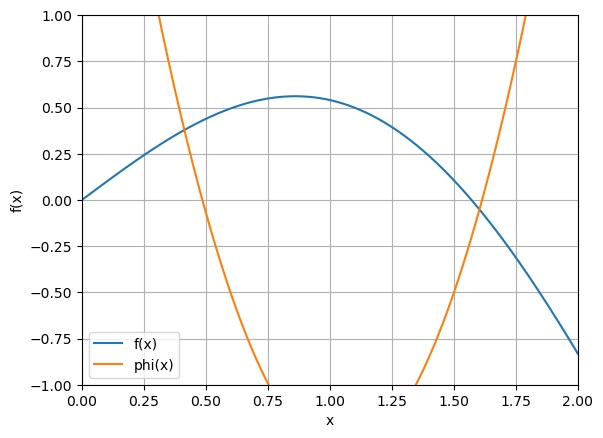

In [92]:
x = np.linspace(0, 2, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x, coefficients), label='phi(x)')
ax.set_xlim(0, 2)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

### Наилучшее полиномиальное среднеквадратичное приближение для поточечно заданной функции

Предположим, что нам известны значения функции $f(x)$ на конечном множестве точек отрезка $[a,b]$. Рассмотрим алгоритм построения среднеквадратичного приближения для таблично заданной функции.
Пусть в точках $x_i$ $$a\leq x_0 < x_1 <\ldots x_N \leq b$$ заданы значения функций $f(x_i)$, $i=\overline{0,N}$. Для функций заданных таблично определим скалярное произведение следующим образом $$(f,g) = \sum_{i=0}^{N}p(x_i)f(x_i)g(x_i).$$
Тогда многочлен наилучшего среднеквадратичного приближения может быть построен по формуле выше, где коэффициенты $c_i$ являются решениями системы, которая в рассматриваемом случае примет вид $$\sum_{i=0}^{n}\Big(\sum_{j=0}^{N}p(x_j)x_j^{i+k}\Big) c_i = \sum_{j=0}^{N} p(x_j) f(x_j) x_j^k,\quad k =\overline{0,n}.$$